<h3> Data </h3>

<p> This dataset contains more than 800,000 consumer loans issued from 2007 to 2015. <br>Data can be found here: <a href = "https://www.kaggle.com/wendykan/lending-club-loan-data/version/1">Link</a> </p>

In [33]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv("loan_data_2007_2014.csv", low_memory = False)
df.drop('Unnamed: 0', axis = 1, inplace=True)

<h3> Continuous variables </h3>

In [3]:
#pre-processing strings to int

df['emp_length_int'] = df['emp_length'].str.replace(' year', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('s', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('+', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1', '0')

df['emp_length_int'] = pd.to_numeric(df['emp_length_int'])

C:\Users\ngchi\AppData\Local\Temp\ipykernel_9688\3208970195.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length_int'] = df['emp_length_int'].str.replace('+', '')


In [4]:
#pre-processing strings to int

df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].str.strip()

df['term_int'] = pd.to_numeric(df['term_int'])

In [5]:
df = df.dropna(subset = ['earliest_cr_line'])

In [6]:
#reading in cr line date. When we convert to datetime, those with 60s get misinterpreted as 2060s instead of 1960s. 
#anything with the %y year below 69 will be attributed a century of 2000, and 69 upwards get 1900

list_a = list()

for i in df['earliest_cr_line']:
    
    if (23 <= float(i[-2:]) < 69):
        
        i = list(i)
        i.insert(4, '1')
        i.insert(5, '9')
        
        i = "".join(i)       #convert list back to string
    
    elif (0 <= float(i[-2:]) < 23): 
        
        i = list(i)
        i.insert(4, '2')
        i.insert(5, '0')
        
        i = "".join(i)
        
    else:
        
        i = list(i)
        i.insert(4, '1')
        i.insert(5, '9')
        
        i = "".join(i)   
        
    list_a.append(i)

In [7]:
df['earliest_cr_line'] = list_a

In [8]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%Y')
df['months_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M'))

In [9]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M'))

In [10]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

<h3> Discrete variables </h3>

In [11]:
df_dummies = [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = " : "), 
              pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = " : "), 
              pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = " : "),
              pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = " : "),
              pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = " : "),
              pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = " : "),
              pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = " : "),
              pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = " : ")]

In [12]:
df_dummies = pd.concat(df_dummies, axis = 1)

In [13]:
df = pd.concat([df, df_dummies], axis = 1)

<h3> Missing treatment </h3>

In [14]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
                          ..
addr_state : WI            0
addr_state : WV            0
addr_state : WY            0
initial_list_status : f    0
initial_list_status : w    0
Length: 206, dtype: int64

In [15]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)

<h3> Dependent variables </h3>

In [16]:
# 1 means defaulted, 0 means non-default

df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',  'Does not meet the credit policy. Status:Charged Off']), 1 , 0)
df[['good_bad', 'loan_status']]

,good_bad,loan_status
0,0,Fully Paid
1,1,Charged Off
2,0,Fully Paid
3,0,Fully Paid
4,0,Current
...,...,...
466280,0,Current
466281,1,Charged Off
466282,0,Current
466283,0,Fully Paid


<h3> Train-Test split </h3>

In [17]:
 from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(df.drop('good_bad', axis = 1), df['good_bad'], test_size = 0.2)

<h3> WOE for Binning Categorical Variables </h3>

<p> For 'Grade' </p>

In [31]:
def woe_discrete(categorical_var):
    
    WoE_results = pd.DataFrame()

    WoE_results[categorical_var] = x_train[categorical_var]
    WoE_results['Good_Bad'] = y_train

    Count = WoE_results.groupby([categorical_var]).count().reset_index()
    Mean = WoE_results.groupby([categorical_var]).mean().reset_index()

    df1 = pd.concat([Count, Mean], axis = 1)
    df1 = df1.iloc[:,[0,1,3]]

    df1.columns = [categorical_var, 'n_obs', 'prop_bad']

    df1['prop_good'] = 1 - df1['prop_bad']

    df1['n_bad'] = df1['prop_bad'] * df1['n_obs']
    df1['n_good'] = df1['prop_good'] * df1['n_obs']

    df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
    df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()

    df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])

    df1['%Good - %Bad'] = df1['prop_n_good'] - df1['prop_n_bad'] 

    df1['IV'] = df1['WoE'] * df1['%Good - %Bad']

    df1.IV = df1.IV.sum()
    
    df1.sort_values(by='WoE', inplace = True)

    return df1

woe_discrete('grade')

,grade,n_obs,prop_bad,prop_good,n_bad,n_good,prop_n_bad,prop_n_good,WoE,%Good - %Bad,IV
6,G,2665,0.280300,0.719700,747.0,1918.0,0.018350,0.005772,-1.156601,-0.012578,0.294636
5,F,10609,0.241493,0.758507,2562.0,8047.0,0.062934,0.024216,-0.955063,-0.038718,0.294636
4,E,28497,0.195143,0.804857,5561.0,22936.0,0.136604,0.069023,-0.682644,-0.067581,0.294636
3,D,61500,0.154407,0.845593,9496.0,52004.0,0.233265,0.156499,-0.399124,-0.076766,0.294636
2,C,100236,0.114969,0.885031,11524.0,88712.0,0.283082,0.266968,-0.058611,-0.016115,0.294636
1,B,109559,0.077575,0.922425,8499.0,101060.0,0.208774,0.304127,0.376192,0.095353,0.294636
0,A,59938,0.038707,0.961293,2320.0,57618.0,0.056990,0.173394,1.112694,0.116404,0.294636


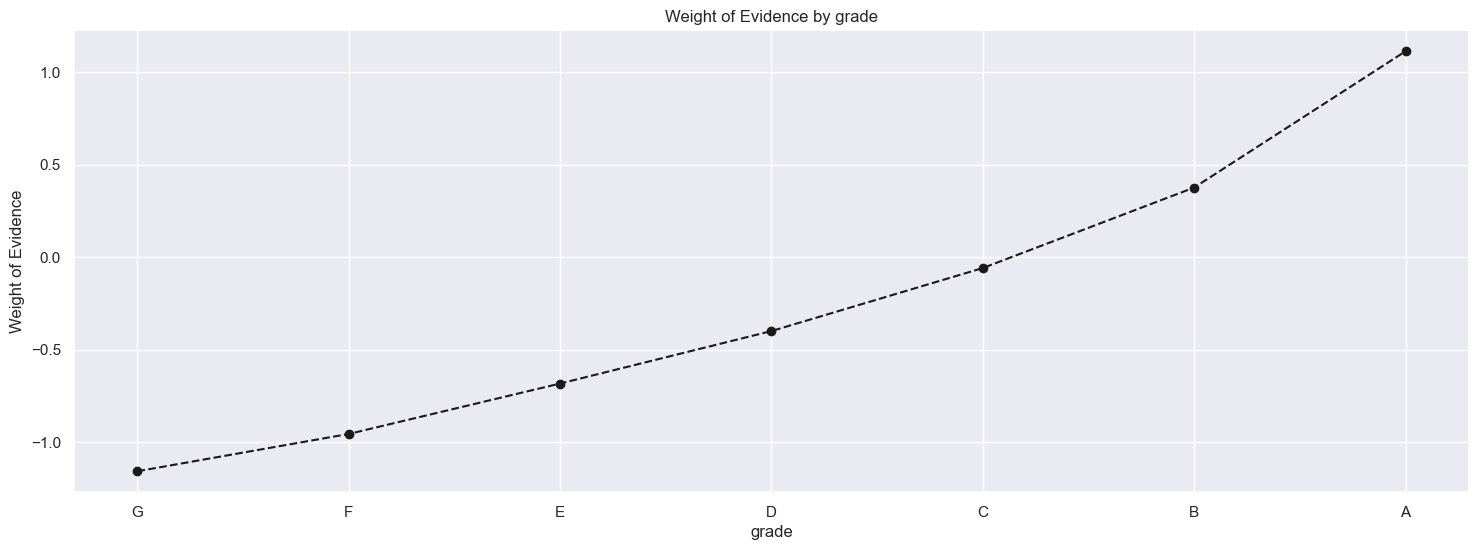

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()                                #make sns the default style compared to matplotlib

def plot_by_woe(df, rotation_of_x_axis_labels = 0):
    x = np.array(df.iloc[:, 0].apply(str))               #matplotlib works better with numpy and scipy
    y = df['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    
plot_by_woe(woe_discrete('grade'))
#looks ok

<p> For 'home ownership' </p>

In [25]:
woe_discrete('home_ownership')

,home_ownership,n_obs,prop_bad,prop_good,n_bad,n_good,prop_n_bad,prop_n_good,WoE,%Good - %Bad,IV
3,OTHER,143,0.195804,0.804196,28.0,115.0,0.000688,0.000346,-0.686846,-0.000342,inf
2,NONE,37,0.162162,0.837838,6.0,31.0,0.000147,0.000093,-0.457346,-0.000054,inf
5,RENT,150648,0.125684,0.874316,18934.0,131714.0,0.465106,0.396377,-0.159900,-0.068729,inf
4,OWN,33372,0.108204,0.891796,3611.0,29761.0,0.088703,0.089562,0.009640,0.000859,inf
1,MORTGAGE,188803,0.096026,0.903974,18130.0,170673.0,0.445356,0.513619,0.142607,0.068263,inf
0,ANY,1,0.000000,1.000000,0.0,1.0,0.000000,0.000003,inf,0.000003,inf


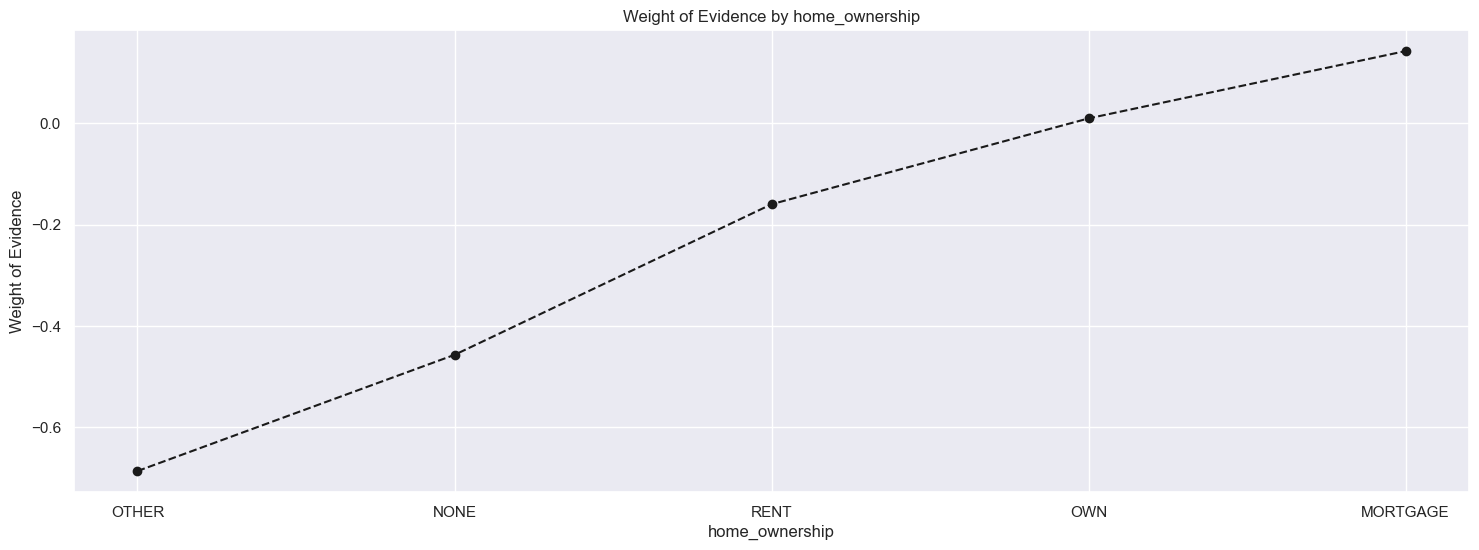

In [23]:
plot_by_woe(woe_discrete('home_ownership'))
#looks ok but OTHER, NONE and ANY have very low number of observations. Will group with RENT since closest to its WoE. 

In [29]:
x_train['home_ownership:RENT_OTHER_NONE_ANY'] = sum([x_train['home_ownership : RENT'], x_train['home_ownership : OTHER'],
                                                            x_train['home_ownership : NONE'], x_train['home_ownership : ANY']])

<p> for 'address state' </p>

In [34]:
woe_discrete('addr_state')

,addr_state,n_obs,prop_bad,prop_good,n_bad,n_good,prop_n_bad,prop_n_good,WoE,%Good - %Bad,IV
28,NE,13,0.538462,0.461538,7.0,6.0,0.000172,0.000018,-2.253725,-1.538959e-04,inf
12,IA,11,0.272727,0.727273,3.0,8.0,0.000074,0.000024,-1.118745,-4.961878e-05,inf
32,NV,5197,0.135463,0.864537,704.0,4493.0,0.017293,0.013521,-0.246076,-3.772355e-03,inf
9,FL,25346,0.127949,0.872051,3243.0,22103.0,0.079663,0.066516,-0.180359,-1.314678e-02,inf
11,HI,2018,0.121903,0.878097,246.0,1772.0,0.006043,0.005333,-0.125041,-7.102787e-04,inf
1,AL,4627,0.119084,0.880916,551.0,4076.0,0.013535,0.012266,-0.098437,-1.268881e-03,inf
33,NY,32215,0.116157,0.883843,3742.0,28473.0,0.091921,0.085686,-0.070238,-6.234794e-03,inf
20,MD,8739,0.115459,0.884541,1009.0,7730.0,0.024786,0.023262,-0.063425,-1.523211e-03,inf
18,LA,4420,0.115158,0.884842,509.0,3911.0,0.012503,0.011770,-0.060474,-7.337151e-04,inf
24,MO,6000,0.113500,0.886500,681.0,5319.0,0.016728,0.016007,-0.044096,-7.216262e-04,inf


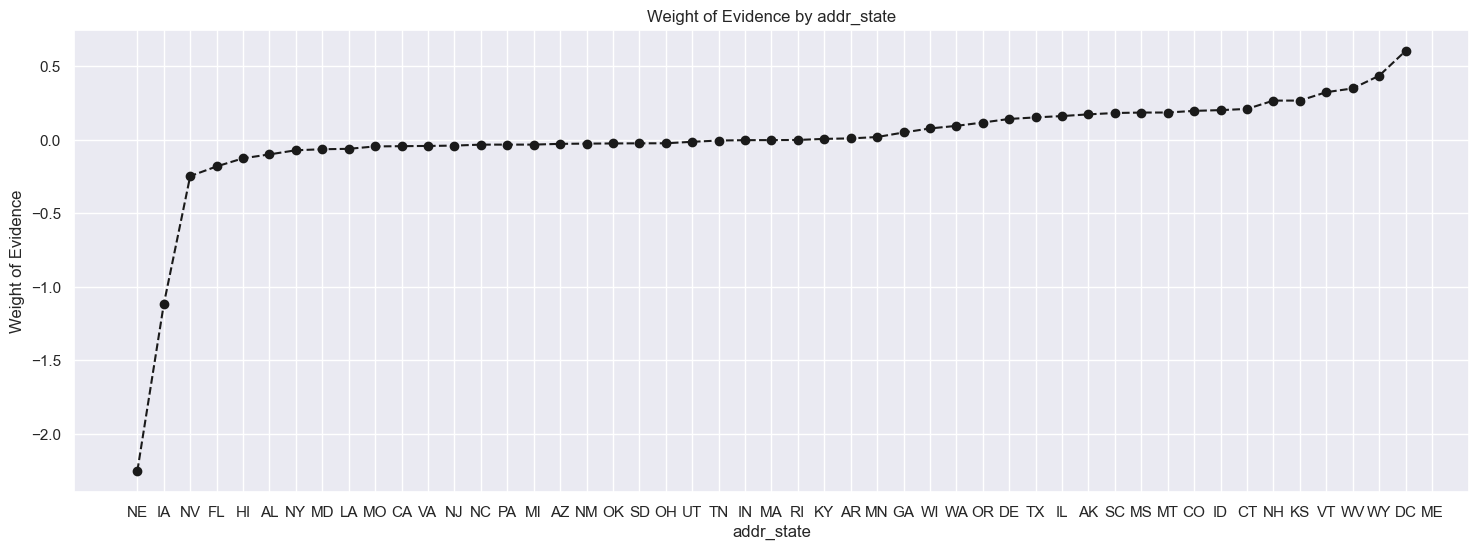

In [24]:
plot_by_woe(woe_discrete('addr_state'))
#need to work on.